In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("/content/iris.csv")

In [3]:
print(iris.head(15))

    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8         

In [9]:
#descriptive statistics
print(iris.describe())


       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [11]:
#what can be the classes to be predicted
print("Target Labels", iris["variety"].unique())

Target Labels ['Setosa' 'Versicolor' 'Virginica']


In [12]:
import plotly.express as px
fig = px.scatter(iris, x="sepal.width", y="sepal.length", color="variety")
fig.show()

In [17]:
iris.info()  #check if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
iris['variety'].value_counts()  #how many of each class

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [19]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



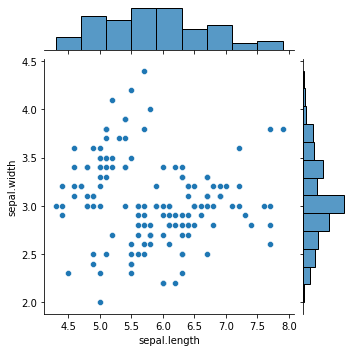

In [22]:
sns.jointplot(x='sepal.length',y='sepal.width',data=iris,size=5)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



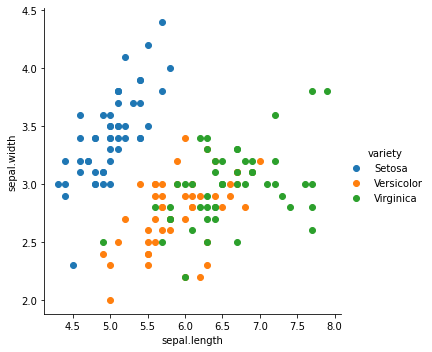

In [23]:

sns.FacetGrid(iris,hue='variety',size=5)\
.map(plt.scatter,'sepal.length','sepal.width')\
.add_legend()

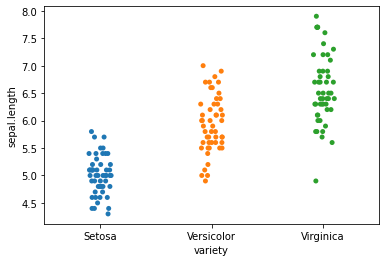

In [25]:
ax=sns.stripplot(x='variety',y='sepal.length',data=iris,jitter=True,edgecolor='white')

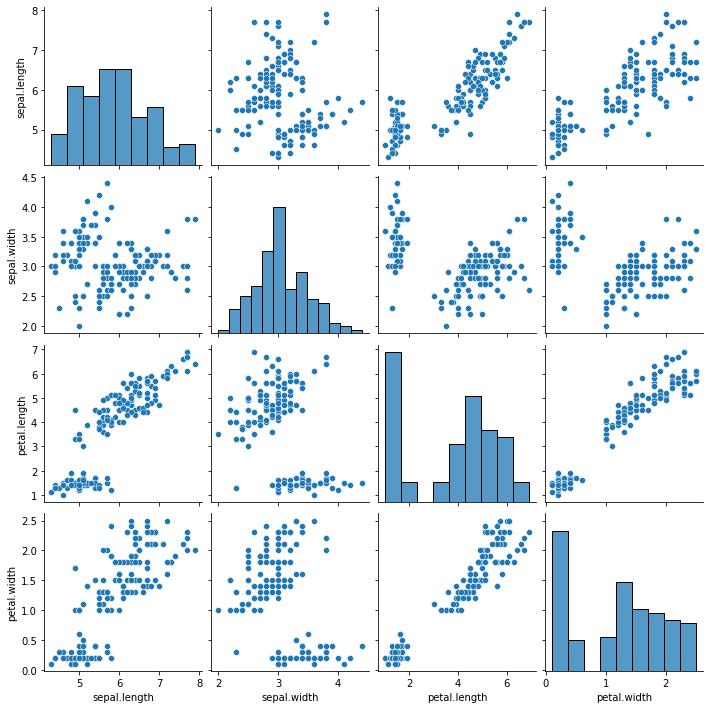

In [26]:
sns.pairplot(data=iris,kind='scatter')

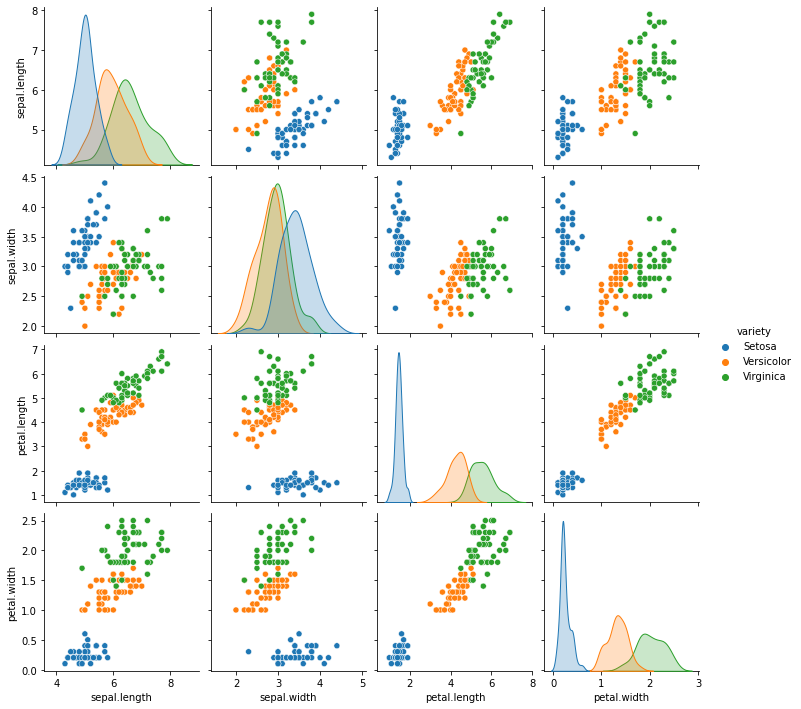

In [28]:
sns.pairplot(iris,hue='variety')

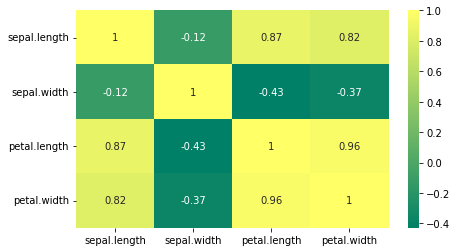

In [29]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='summer')
#heatmap 

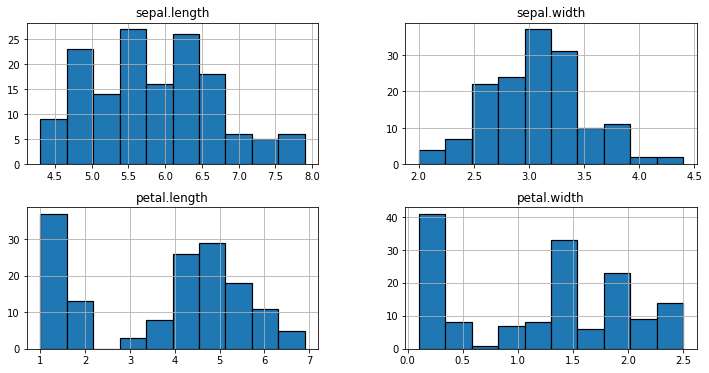

In [30]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
#distribution plot

In [33]:
#The k-nearest neighbors classifier (kNN) is a non-parametric supervised machine learning algorithm. 
#It's distance-based: it classifies objects based on their proximate neighbors' classes.

#x-set contains the values what will be trained in order to predict y, so take all csv file, except species(y) column
x = iris.drop("variety", axis=1)
#value to be predicted
y = iris["variety"]
from sklearn.model_selection import train_test_split
#80% train, 20%test
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))
print(x_test)
pred=knn.predict(x_test)
print(pred)
print(type(y_test))
y_true=y
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred) # Accuracy

Prediction: ['Setosa']
     sepal.length  sepal.width  petal.length  petal.width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9           6.3          1.8
7             5.0          3.4           1.5          0.2
100           6.3          3.3           6.0          2.5
40            5.0          3.5           1.3          0.3
86            6.7          3.1           4.7          1.5
76            6.8          2.8           4.8          1.4
71            6.1          2.8           4.0          1.3
134           6.1          2.6           5.6          1.4
51            6.4          3.2           4.5          1.5
73            6.1          2.8           4.7          1.2
54            6.5          2.8           4.6          1.5
63            6.1          2.9           4.7          1.4
37            4.9          3.6           1.4     

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



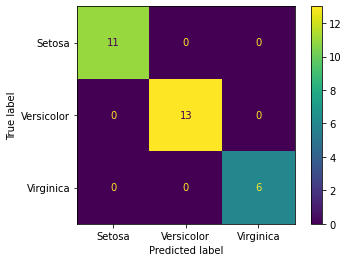

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test) 


In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
#here, 100% acc


1.0


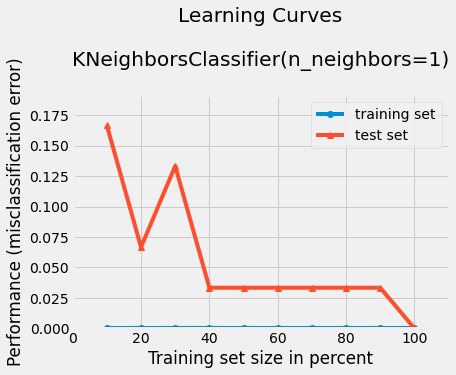

In [48]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train, x_test, y_test, knn)
plt.show()

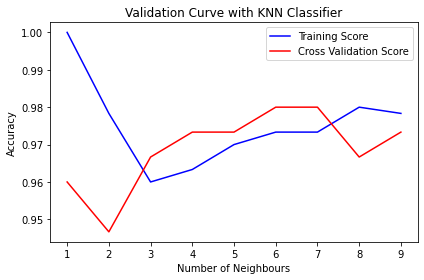

In [54]:
from sklearn.model_selection import validation_curve
parameter_range = np.arange(1, 10, 1)
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), x, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [56]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [64]:
#Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset, 
#where is the number of dimensions for input and is the number of dimensions for output. 
from sklearn.neural_network import MLPClassifier

In [74]:
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(10, 5), random_state=1)
clf1.fit(x_train,y_train)
clf1.predict(x_test)
y_pred1=clf1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 1.0


0.9733333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names



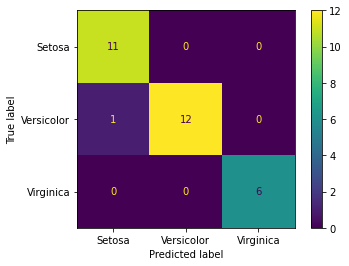

In [96]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=800)
mlp.fit(x,y)
pred=mlp.predict(x)
score=mlp.score(x,y)
print(score)
plot_confusion_matrix(mlp, x_test, y_test) 

# cm=confusion_matrix(y,pred, labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])